<a href="https://colab.research.google.com/github/amitshahi04/PyTorch/blob/Master/02_python_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Neural Network classificiation with PyTorch

##1. Data
#Make classification data

import sklearn

from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f'first 5 sample of X: {X[:5]}')
print(f'first 5 sample of y: {y[:5]}')

first 5 sample of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 sample of y: [1 1 1 1 0]


In [ ]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


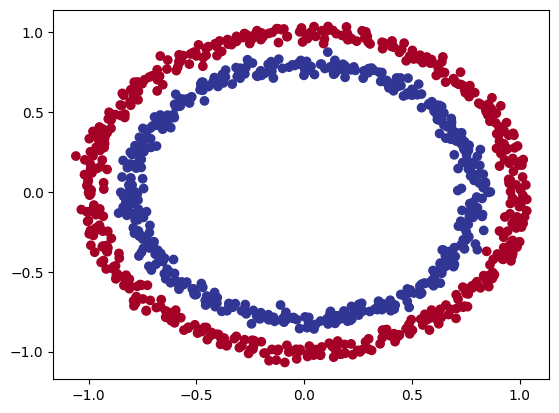

In [ ]:
#Visualize visualize visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:, 1],c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
#check input and output shapes

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of x:{X_sample.shape} and the smae for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of x:(2,) and the smae for y: ()


In [ ]:
#Turn data into tensors and create train and test splits

import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
#Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state= 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

# building a model

#Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #Create 2 Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)#takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)# takes in 5 feautres from previous layer and outputs single feature(same shape as y)

    #define a forward method that outline forward pass
    def forward(self, x):
      return self.layer_2(self.layer_1(1)) #x->layer_1->layer_2->output

#Model
  # model = torch.nn.Sequential(
  #     torch.nn.Linear(2, 10),
  #     torch.nn.ReLU(),
  #     torch.nn.Linear(10, 1),
  #     torch.nn.Sigmoid()
  # )

#instantiate an instance of model class
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Let's replicate the model above using nn.Sequential

model_0= nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2860,  0.4821],
                      [-0.2993, -0.5171],
                      [-0.2934,  0.3322],
                      [ 0.3668, -0.0349],
                      [ 0.1172,  0.4353]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0632,  0.4659, -0.5585, -0.2457,  0.5953], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3899,  0.2762, -0.0682, -0.1977, -0.1223]], device='cuda:0')),
             ('1.bias', tensor([-0.2932], device='cuda:0'))])

In [ ]:
#Make preidictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of the predictions:{len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions:\n{untrained_preds[:10]}")
print(f"\m First 10 labels:\n{y_test[:10]}")

Length of the predictions:200, shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions:
tensor([[-0.0936],
        [-0.2021],
        [ 0.0157],
        [-0.1238],
        [-0.2626],
        [-0.3267],
        [-0.4118],
        [-0.4417],
        [ 0.0273],
        [-0.2125]], device='cuda:0')
\m First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
#Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr= 0.1)


In [ ]:
#Calculate accuracy TP/(TP+TN)
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0936],
        [-0.2021],
        [ 0.0157],
        [-0.1238],
        [-0.2626]], device='cuda:0')

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4766],
        [0.4496],
        [0.5039],
        [0.4691],
        [0.4347]], device='cuda:0')

In [ ]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 0.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#Train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test, y_pred=test_pred)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70116, Acc: 45.50% | Test Loss: 0.69687, Test Acc: 49.00%
Epoch: 100 | Loss: 0.69426, Acc: 50.50% | Test Loss: 0.69286, Test Acc: 49.50%
Epoch: 200 | Loss: 0.69342, Acc: 49.75% | Test Loss: 0.69340, Test Acc: 51.50%
Epoch: 300 | Loss: 0.69314, Acc: 50.25% | Test Loss: 0.69385, Test Acc: 50.00%
Epoch: 400 | Loss: 0.69304, Acc: 50.88% | Test Loss: 0.69415, Test Acc: 49.00%
Epoch: 500 | Loss: 0.69300, Acc: 50.88% | Test Loss: 0.69435, Test Acc: 45.50%
Epoch: 600 | Loss: 0.69299, Acc: 51.00% | Test Loss: 0.69448, Test Acc: 47.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69456, Test Acc: 47.00%
Epoch: 800 | Loss: 0.69298, Acc: 50.88% | Test Loss: 0.69460, Test Acc: 46.50%
Epoch: 900 | Loss: 0.69298, Acc: 51.38% | Test Loss: 0.69463, Test Acc: 46.00%


In [ ]:
#Investigate why model isn't learning
#How to? Visualize
#Make predictions and make them visual

import requests
from pathlib import Path

#Dowanload helper functions from Learn PyTorch repo(if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists. skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

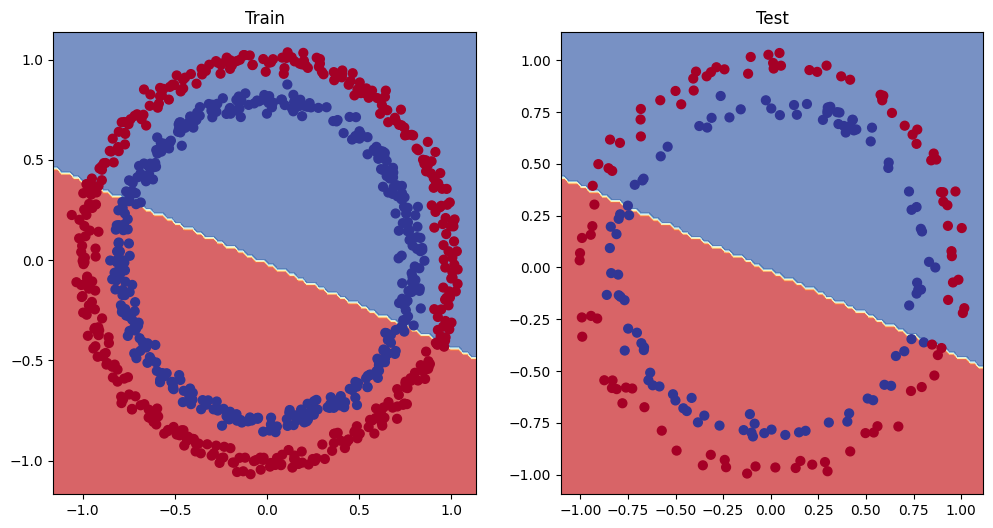

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_Test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred= y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_logits = model_1(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))
    test_loss = loss_fn(y_test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred= y_test_pred)
  if epoch % 100 == 0:
    print(f"Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Loss: 0.69396 | Acc: 50.88 | Test Loss: 0.69261 | Test Acc: 51.00
Loss: 0.69305 | Acc: 50.38 | Test Loss: 0.69379 | Test Acc: 48.00
Loss: 0.69299 | Acc: 51.12 | Test Loss: 0.69437 | Test Acc: 46.00
Loss: 0.69298 | Acc: 51.62 | Test Loss: 0.69458 | Test Acc: 45.00
Loss: 0.69298 | Acc: 51.12 | Test Loss: 0.69465 | Test Acc: 46.00
Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69467 | Test Acc: 46.00
Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00
Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00
Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00
Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 46.00


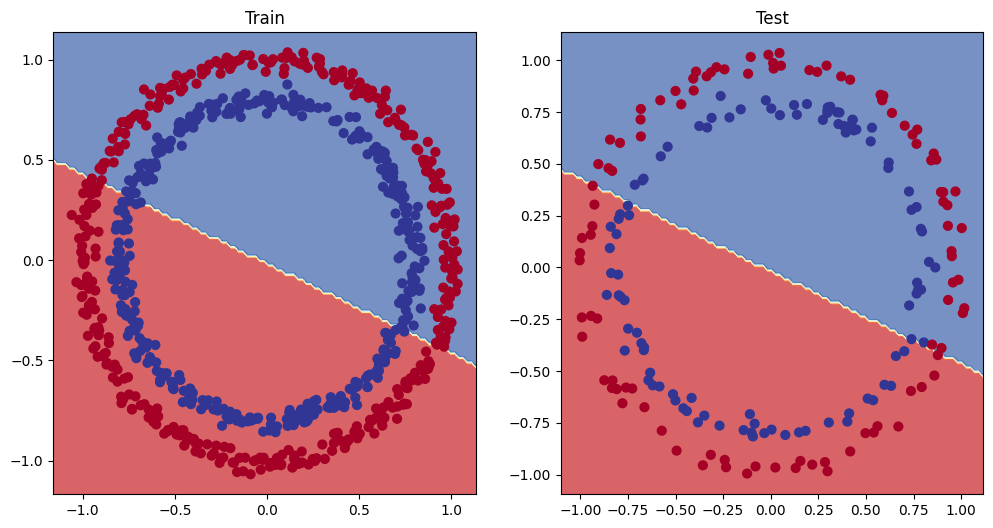

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

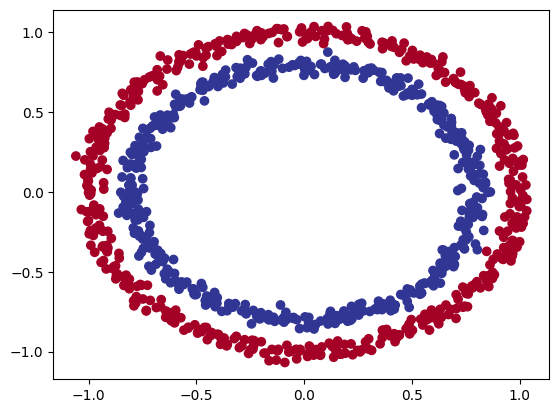

In [ ]:
#The missing piece: non-linearity
#Recreate non-linear data (red and blue circles)

#Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve

n_sample = 1000

Xx, y = make_circles(n_sample,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap= plt.cm.RdYlBu);



In [ ]:
#convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X= torch.from_numpy(Xx).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train, X_test, y_train, y_Test = train_test_split(X,
                                                   y,
                                                   test_size =0.2,
                                                   random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
#Build a model with non linear activation function

# from torch import nn

# class CircleModelV2(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.layer_1 = nn.Linear(in_features=2, out_features=10)
#     self.layer_2 = nn.Linear(in_features=10, out_features=10)
#     self.layer_3 = nn.Linear(in_features=10, out_features=1)
#     self.relu = nn.ReLU()

#   def forward(self, x):
#     return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# model_3 = CircleModelV2().to(device)

In [ ]:
# model_3
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_3.parameters(),
                           lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true= y_train,
                    y_pred= y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits= model_3(X_test).squeeze()
    test_preds= torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true= y_test,
                           y_pred= test_pred)
  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")


Epoch: 0 | Loss: 0.6929463148117065 | Accuracy: 51.0 | Test Loss: 0.6931881308555603 | Test Accuracy: 45.5
Epoch: 100 | Loss: 0.691152811050415 | Accuracy: 51.0 | Test Loss: 0.6910240054130554 | Test Accuracy: 45.5
Epoch: 200 | Loss: 0.6897744536399841 | Accuracy: 51.0 | Test Loss: 0.6893961429595947 | Test Accuracy: 45.5
Epoch: 300 | Loss: 0.6879494190216064 | Accuracy: 51.0 | Test Loss: 0.6872316002845764 | Test Accuracy: 45.5
Epoch: 400 | Loss: 0.6851678490638733 | Accuracy: 51.0 | Test Loss: 0.6841148734092712 | Test Accuracy: 45.5
Epoch: 500 | Loss: 0.6810224652290344 | Accuracy: 51.0 | Test Loss: 0.6794120073318481 | Test Accuracy: 45.5
Epoch: 600 | Loss: 0.675148606300354 | Accuracy: 51.0 | Test Loss: 0.6728507876396179 | Test Accuracy: 45.5
Epoch: 700 | Loss: 0.6665886640548706 | Accuracy: 51.0 | Test Loss: 0.6632164716720581 | Test Accuracy: 45.5
Epoch: 800 | Loss: 0.6515955328941345 | Accuracy: 51.0 | Test Loss: 0.647568941116333 | Test Accuracy: 45.5
Epoch: 900 | Loss: 0.623

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 100 | Loss: 0.48153, Accuracy: 93.50% | Test Loss: 0.49935, Test Accuracy: 90.50%
Epoch: 200 | Loss: 0.37056, Accuracy: 97.75% | Test Loss: 0.40595, Test Accuracy: 92.00%
Epoch: 300 | Loss: 0.25458, Accuracy: 99.00% | Test Loss: 0.30333, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.17180, Accuracy: 99.50% | Test Loss: 0.22108, Test Accuracy: 97.50%
Epoch: 500 | Loss: 0.12188, Accuracy: 99.62% | Test Loss: 0.16512, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.09123, Accuracy: 99.88% | Test Loss: 0.12741, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.07100, Accuracy: 99.88% | Test Loss: 0.10319, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.05773, Accuracy: 99.88% | Test Loss: 0.08672, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.04853, Accuracy: 99.88% | Test Loss: 0.07474, Test Accuracy: 99.50%


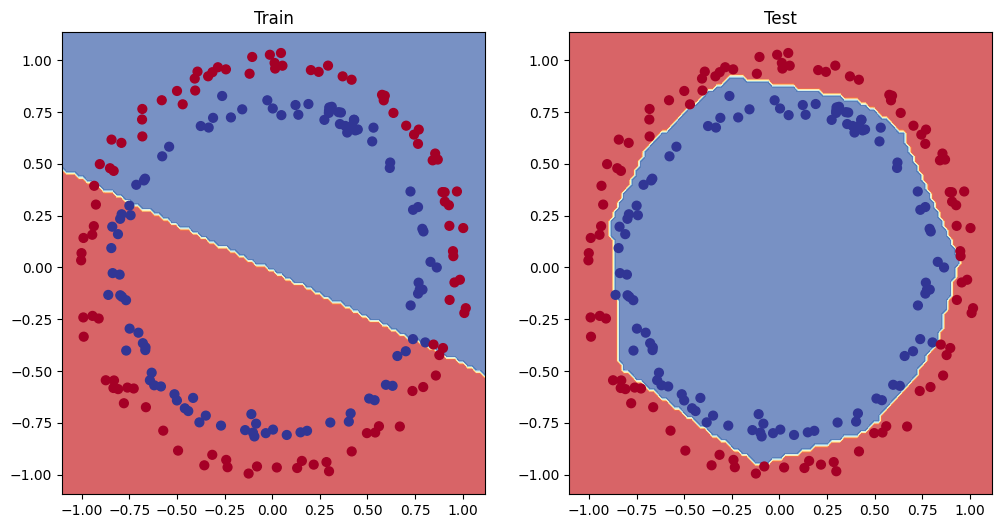

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_test, y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
A= torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

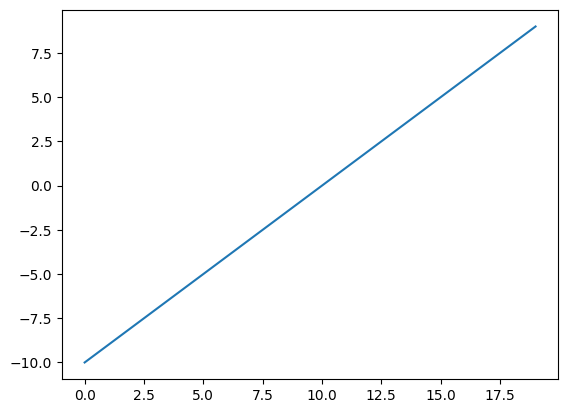

In [ ]:
plt.plot(A);

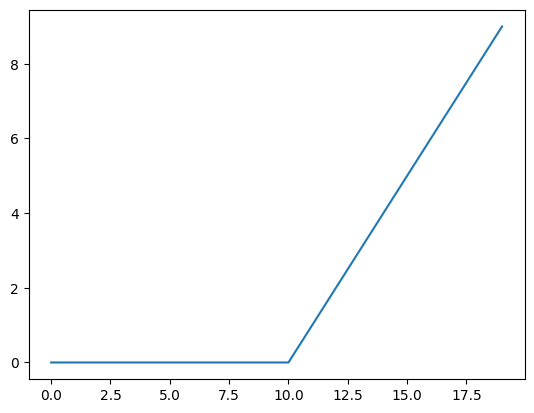

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor)-> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)  #inputs must be tensors

relu(A)



tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

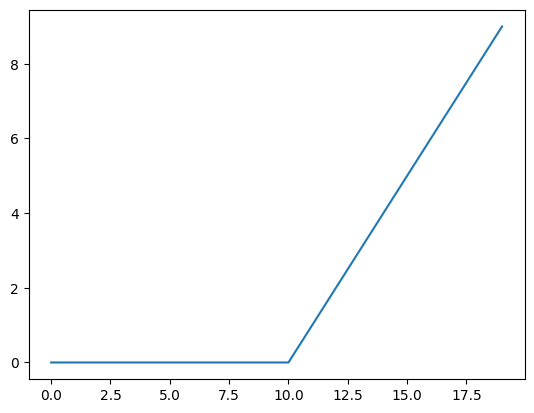

In [ ]:
#Plot custom relu

plt.plot(relu(A));

In [ ]:
#make custom sigmoid

def sigmoid(x):
  return 1/(1+torch.exp(-x))

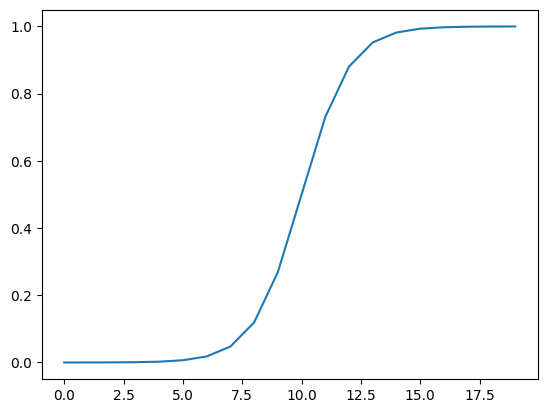

In [ ]:
plt.plot(sigmoid(A));

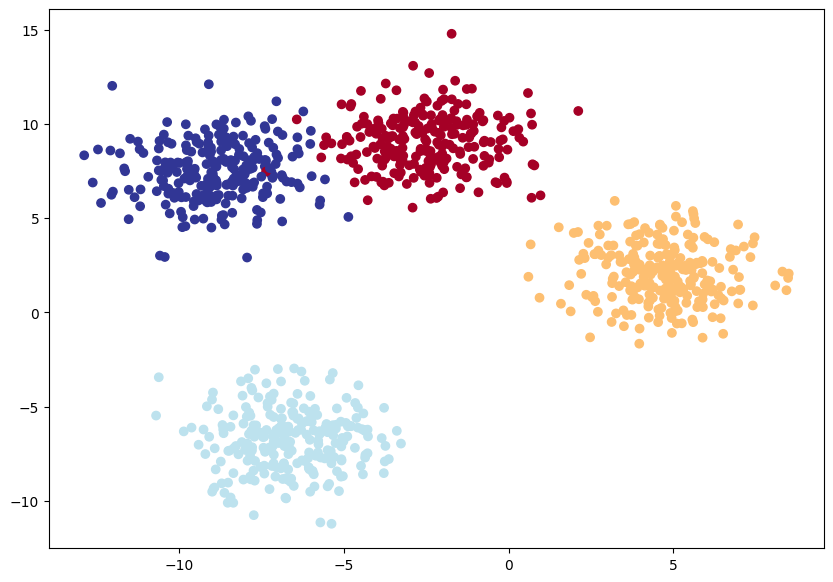

In [ ]:
###Challenge yourself with a multiclass classification problem

#Creating a toy multiclass dataset

#Import Dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES= 4
NUM_FEATURES= 2
RANDOM_SEED= 42

#Create multiclass data
X_blob, y_blob= make_blobs(n_samples= 1000,
                           n_features= NUM_FEATURES,
                           centers= NUM_CLASSES,
                           cluster_std= 1.5,
                           random_state= RANDOM_SEED)

#turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.LongTensor)

#Split train test data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size= 0.2,
                                                                        random_state= RANDOM_SEED)

#plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
#Building a multiclass Classification model in PyTorch

#Create device agnostic code

device= 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

In [ ]:
#Create model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initialized multiclass classificiation model

    Args:
    input_features(int): Number of input features in the model
    output_features(int): Number of output features
    hidden units(int): Number of hidden layers unit b/w layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_features),
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer_stack(x)

#Create an instance of BlobModel and send it to the target device

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
#Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_4.parameters(),
                            lr= 0.1)

In [ ]:
#Getting prediction probabilities for a multiclass pytorch model
model_4(X_blob_train.to(device))[:5]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
#Create train and test loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs= 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test= X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_blob_logits= model_4(X_blob_train)
  y_blob_preds=torch.softmax(y_blob_logits, dim=1).argmax(dim=1)

  loss= loss_fn(y_blob_logits, y_blob_train)
  acc= accuracy_fn(y_true= y_blob_train, y_pred= y_blob_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_blob_logits= model_4(X_blob_test).squeeze()
    test_blob_preds= torch.softmax(test_blob_logits, dim=1).argmax(dim=1)
    test_blob_loss= loss_fn(test_blob_logits, y_blob_test)
    test_acc= accuracy_fn(y_true= y_blob_test, y_pred= test_blob_preds)

  if epoch%10 == 0:
    print(f"Epoch: {epoch}| loss:{loss}| Accuracy:{acc}| Test Loss:{test_loss}| Test Accuracy:{test_acc}")



Epoch: 0| loss:1.1588265895843506| Accuracy:40.375| Test Loss:0.06591329723596573| Test Accuracy:48.0
Epoch: 10| loss:0.6447554230690002| Accuracy:96.75| Test Loss:0.06591329723596573| Test Accuracy:97.5
Epoch: 20| loss:0.42535150051116943| Accuracy:98.5| Test Loss:0.06591329723596573| Test Accuracy:100.0
Epoch: 30| loss:0.2529423236846924| Accuracy:99.125| Test Loss:0.06591329723596573| Test Accuracy:99.5
Epoch: 40| loss:0.11232151091098785| Accuracy:99.25| Test Loss:0.06591329723596573| Test Accuracy:99.5
Epoch: 50| loss:0.06626511365175247| Accuracy:99.25| Test Loss:0.06591329723596573| Test Accuracy:99.5
Epoch: 60| loss:0.05068015679717064| Accuracy:99.25| Test Loss:0.06591329723596573| Test Accuracy:99.5
Epoch: 70| loss:0.042996764183044434| Accuracy:99.25| Test Loss:0.06591329723596573| Test Accuracy:99.5
Epoch: 80| loss:0.038361385464668274| Accuracy:99.25| Test Loss:0.06591329723596573| Test Accuracy:99.5
Epoch: 90| loss:0.03524843230843544| Accuracy:99.25| Test Loss:0.06591329

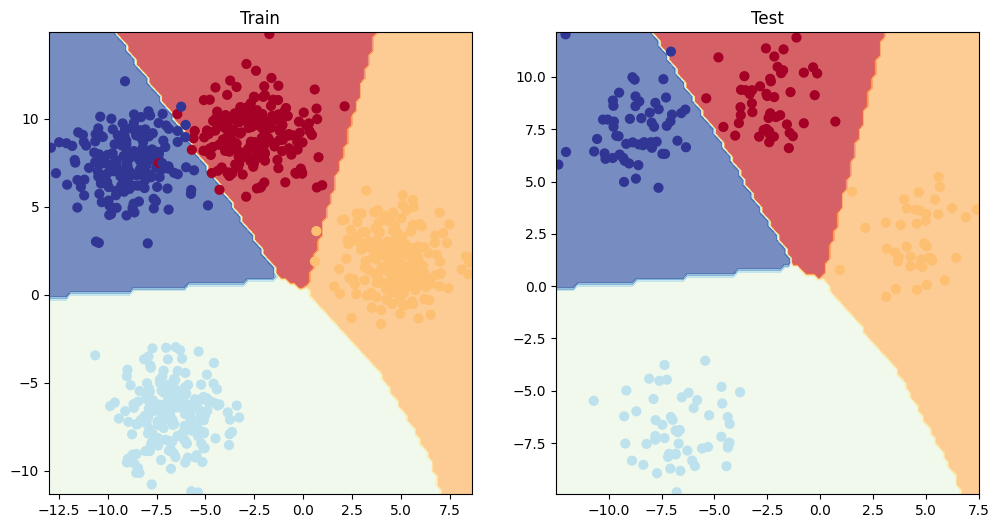

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
data= torch.arange(1, 9, 1)
print(data)
tensor= torch.tensor([1,2,3,4,5,6,7,9])
tensor

tensor([1, 2, 3, 4, 5, 6, 7, 8])


tensor([1, 2, 3, 4, 5, 6, 7, 9])

In [ ]:
correct= torch.eq(data, tensor).sum().item()
correct

7

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 5.5 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

torch_acc= Accuracy(task="multiclass", num_classes=4).to(device)
torch_acc(y_blob_test, test_blob_preds)

tensor(0.9950, device='cuda:0')